In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./pet_df.csv')
data = data.drop_duplicates('mission-id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 12711
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             739 non-null    object 
 1   species          739 non-null    int64  
 2   mission-id       739 non-null    object 
 3   provider-code    739 non-null    int64  
 4   breed            739 non-null    object 
 5   age              739 non-null    float64
 6   class            739 non-null    object 
 7   sex              739 non-null    object 
 8   weight           739 non-null    float64
 9   shoulder-height  739 non-null    float64
 10  neck-size        739 non-null    float64
 11  back-length      739 non-null    float64
 12  chest-size       739 non-null    float64
 13  BCS              739 non-null    int64  
 14  body-part        739 non-null    int64  
 15  exercise         739 non-null    int64  
 16  food-count       739 non-null    int64  
 17  environment   

---

# 간단히 변수 별 확인

In [3]:
data.species.value_counts()

10    728
20     11
Name: species, dtype: int64

### 강아지 나이 전처리

In [4]:
print(data.age.describe())
print('\nMinimum Age is:', data.age.min())

count    739.000000
mean       6.409242
std        3.935863
min        0.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       21.000000
Name: age, dtype: float64

Minimum Age is: 0.0


In [5]:
print(data.loc[data['age'] == 0][['mission-id', 'weight', 'breed', 'age', 'image-id']])
print('\n The number of Pet whose Age 0 is:',
      data.loc[data['age'] == 0]['mission-id'].count())

      mission-id  weight breed  age                               image-id
52     10_000087    6.00   MIX  0.0  A_10_MIX_IM_20221017_10_000087_20.jpg
209    10_000216    2.91   MAL  0.0  A_10_MAL_IM_20221020_10_000216_01.jpg
286    10_000225   11.50   ETC  0.0  A_10_ETC_IM_20221020_10_000225_17.jpg
300    10_000226   11.00   ETC  0.0  A_10_ETC_IF_20221020_10_000226_04.jpg
350    10_000229   18.00   ETC  0.0  A_10_ETC_IF_20221020_10_000229_05.jpg
685    10_000278   22.00   POO  0.0  A_10_POO_CM_20221024_10_000278_19.jpg
1102   10_000363   46.00   ETC  0.0  A_10_ETC_CM_20221028_10_000363_19.jpg
1429   10_000407   13.00   ETC  0.0  A_10_ETC_IM_20221101_10_000407_08.jpg
2376   10_000695   15.00   MIX  0.0  A_10_MIX_IM_20221106_10_000695_16.jpg
2446   10_000706    1.38   POO  0.0  A_10_POO_IF_20221106_10_000706_01.jpg
2478   10_000720    2.40   MAL  0.0  A_10_MAL_IM_20221106_10_000720_19.jpg
2647   10_000780    2.60   POM  0.0  A_10_POM_IF_20221107_10_000780_19.jpg
5076   10_000995    3.10 

- 맨 아래 행은 고양이라 제외
- 0살인 강아지 18마리는 체중 등을 봤을 때 0살 아닌데 잘못 입력되거나
- 알 수 없는데 nan이 아니라 0으로 기록한 듯

In [6]:
# 10_000087는 6년 9개월
# 이 강아지만 사진에서 나이 식별이 가능했음
data.loc[data['mission-id'] == '10_000087', 'age'] = 6

- 나머지 17마리 강아지에 대해서는 어떡하지
- 1. 결측으로 생각하고 삭제
- 2. 평균 나이로 채우기
- 3. 품종 별 평균 나이로 채우기
- 4. 회귀식으로 보간

In [7]:
data.loc[data['age'] == 0, 'age'] = np.NaN
data.age.isnull().sum()

18

In [8]:
data.dropna(axis = 0, inplace = True)
data.shape

(721, 27)

### 일단 나이가 0인 강아지 17마리, 고양이 1마리 삭제함

---

In [9]:
data['class'].value_counts() # 반려견 대중소, 반려묘-단/장모

SS    585
MS     89
LS     29
UK      8
SH      7
LH      3
Name: class, dtype: int64

In [10]:
data.sex.value_counts()

CM    263
SF    232
IF    143
IM     83
Name: sex, dtype: int64

---

### 체중 변수 전처리

In [11]:
print(data.weight.describe())
print('\n Minimum weight is:', data.weight.min())

count    721.000000
mean       6.113523
std        5.864533
min        0.000000
25%        3.300000
50%        4.360000
75%        6.490000
max       46.800000
Name: weight, dtype: float64

 Minimum weight is: 0.0


- 체중이 0인 강아지 전처리 필요
- 1. 삭제
- 2. 보간

In [15]:
data.loc[data['weight'] == 0, 'weight'] = np.NaN
data.weight.isnull().sum()

1

In [16]:
data.dropna(axis = 0, inplace = True)
data.shape

(720, 27)

### 일단 체중이 0인 강아지도 삭제

---

In [17]:
data['food-count'].value_counts()

2    462
4    156
1     83
3     19
Name: food-count, dtype: int64

In [18]:
data['food-kind'].value_counts()

1    568
2    151
3      1
Name: food-kind, dtype: int64

---
### 1회 식사량 전처리

In [19]:
data['food-amount'].describe()

count    720.000000
mean       1.205472
std        1.219179
min        0.100000
25%        0.500000
50%        1.000000
75%        1.400000
max       19.980000
Name: food-amount, dtype: float64

In [20]:
data['food-amount'].sort_values(ascending = False)

4621     19.98
9909     15.00
1339      8.00
9165      6.50
2414      5.00
         ...  
1535      0.24
476       0.20
425       0.20
5824      0.10
10348     0.10
Name: food-amount, Length: 720, dtype: float64

In [21]:
data.columns

Index(['type', 'species', 'mission-id', 'provider-code', 'breed', 'age',
       'class', 'sex', 'weight', 'shoulder-height', 'neck-size', 'back-length',
       'chest-size', 'BCS', 'body-part', 'exercise', 'food-count',
       'environment', 'defecation', 'food-amount', 'snack-amount', 'food-kind',
       'image-id', 'label', 'points', 'shape', 'part'],
      dtype='object')

- 1회 종이컵 기준 20컵, 15컵 먹는 것이 수상함

In [22]:
data.loc[(data['food-amount'] == 19.98) | (data['food-amount'] == 15) | (data['food-amount'] == 8) | (data['food-amount'] == 5)][['breed', 'age', 'weight', 'food-count', 'food-amount']]

,breed,age,weight,food-count,food-amount
1339,ETC,3.0,22.50,1,8.00
2359,MIX,6.0,20.00,4,5.00
2414,MIX,5.0,20.00,4,5.00
4621,CHI,8.0,1.80,4,19.98
9909,POO,3.0,2.38,3,15.00


- 22.5kg 강아지가 먹는 사료 8컵은 인정
- 20kg 강아지가 먹는 사료 5컵 하루 4회도 어느정도 인정
- 근데 1.8kg 강아지, 2.4kg 강아지가 먹는 것은 인정하기 힘듦

In [23]:
# 이상치 확인
food_3q = data['food-amount'].quantile(0.75)
food_1q = data['food-amount'].quantile(0.25)

food_IQR = food_3q - food_1q
print(food_1q, food_3q, food_IQR)

0.5 1.4 0.8999999999999999


In [24]:
data.loc[(data['food-amount'] > food_3q + 3 * food_IQR) |
         (data['food-amount'] < food_1q - 3 * food_IQR)][['food-amount', 'food-count']]

,food-amount,food-count
1339,8.00,1
2359,5.00,4
2414,5.00,4
4621,19.98,4
9165,6.50,2
9909,15.00,3


In [25]:
data.loc[data['food-amount'] >= 15, 'food-amount'] = np.NaN
data['food-amount'].isnull().sum()

2

In [26]:
data.dropna(axis = 0, inplace = True)
data.shape

(718, 27)

- 15컵 이상인 두 친구만 삭제
---

In [27]:
data['defecation'].value_counts()

1    712
2      6
Name: defecation, dtype: int64

In [28]:
data.environment.value_counts()

1    713
2      5
Name: environment, dtype: int64

---
### BCS 전처리
- 이전에 데이터 프레임 생성하면서 같은 강아지인데 BCS가 다른 녀석은 더 많은 BCS로 처리

In [29]:
data.BCS.value_counts()

5    291
4    166
6    142
3     63
7     35
2     11
9      6
8      4
Name: BCS, dtype: int64

In [30]:
data['exercise'].value_counts()

2    272
1    266
3    180
Name: exercise, dtype: int64

In [31]:
data['snack-amount'].describe()

count    718.000000
mean      10.212047
std        7.534904
min        0.000000
25%        1.000000
50%       10.000000
75%       19.990000
max       20.000000
Name: snack-amount, dtype: float64

In [32]:
data.type.value_counts()

A    711
B      7
Name: type, dtype: int64

In [33]:
# 데이터 설명에 의하면 snack-amount는 food-amount에 대비 퍼센트
# 하루 식사량 계산하자면
# food-count * food-amount + food-amount * snack-amount * 0.01 = day_food_amount
data['day_food_amount'] = np.NaN
data['day_food_amount'] = round(data['food-amount'] * data['food-count'] + data['food-count'] * data['snack-amount'] * 0.01, 3)

In [34]:
data['day_food_amount']

0        2.020
18       4.020
30       4.800
38       2.400
44       1.690
         ...  
12639    1.406
12645    4.400
12679    4.000
12691    3.200
12711    2.000
Name: day_food_amount, Length: 718, dtype: float64

In [35]:
data.columns

Index(['type', 'species', 'mission-id', 'provider-code', 'breed', 'age',
       'class', 'sex', 'weight', 'shoulder-height', 'neck-size', 'back-length',
       'chest-size', 'BCS', 'body-part', 'exercise', 'food-count',
       'environment', 'defecation', 'food-amount', 'snack-amount', 'food-kind',
       'image-id', 'label', 'points', 'shape', 'part', 'day_food_amount'],
      dtype='object')

In [36]:
df = data[['mission-id', 'breed', 'age', 'weight', 'shoulder-height',
           'neck-size', 'back-length', 'chest-size',
           'sex', 'exercise', 'BCS', 'day_food_amount']]
df.columns = ['mission_id', 'breed', 'age', 'weight', 'shoulder_height',
              'neck_size', 'back_length', 'chest_size',
              'sex', 'exercise', 'BCS', 'day_food_amount']
df

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount
0,10_000077,ETC,4.0,11.00,30.0,31.00,50.00,49.0,IM,3,5,2.020
18,10_000078,ETC,2.0,9.60,35.0,32.00,30.00,50.0,SF,1,5,4.020
30,10_000083,DRI,12.0,3.50,22.0,20.00,30.00,32.0,IF,1,5,4.800
38,10_000084,ETC,4.0,5.75,33.0,20.99,33.99,40.0,SF,3,4,2.400
44,10_000085,POO,16.0,3.59,23.0,22.00,24.00,35.0,IF,3,5,1.690
...,...,...,...,...,...,...,...,...,...,...,...,...
12639,20_000009,RUS,4.0,7.08,20.0,19.00,44.00,44.0,CM,1,9,1.406
12645,20_000016,KOR,7.0,5.00,22.0,19.00,37.00,40.0,CM,2,7,4.400
12679,20_000019,SIA,7.0,3.80,24.0,22.00,22.00,35.0,SF,1,6,4.000
12691,20_000023,KOR,8.0,6.15,25.0,23.00,30.00,42.0,CM,1,7,3.200


In [37]:
df_mal = df.loc[df['breed'] == 'MAL']
df_mal

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount
140,10_000142,MAL,7.0,3.39,20.0,25.0,10.0,32.98,CM,1,5,2.00
222,10_000217,MAL,18.0,2.99,21.0,21.0,19.0,34.00,SF,1,5,1.00
458,10_000236,MAL,1.0,1.70,20.0,16.0,24.0,28.00,IF,2,5,0.76
476,10_000237,MAL,12.0,6.00,22.0,27.0,23.0,47.00,CM,1,7,1.60
556,10_000260,MAL,9.0,5.90,26.0,33.0,35.0,47.00,CM,1,6,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...
11916,10_100050,MAL,2.0,2.50,25.0,22.0,28.0,30.00,IF,2,5,1.01
12435,10_101464,MAL,9.0,3.10,22.0,22.0,23.0,33.00,SF,1,6,4.60
12453,10_101465,MAL,8.0,3.20,25.0,20.0,23.0,34.00,CM,1,6,4.60
12472,10_101466,MAL,9.8,3.69,27.0,28.0,35.0,39.00,CM,2,4,1.00


In [40]:
df_mal

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount
140,10_000142,MAL,7.0,3.39,20.0,25.0,10.0,32.98,CM,1,5,2.00
222,10_000217,MAL,18.0,2.99,21.0,21.0,19.0,34.00,SF,1,5,1.00
458,10_000236,MAL,1.0,1.70,20.0,16.0,24.0,28.00,IF,2,5,0.76
476,10_000237,MAL,12.0,6.00,22.0,27.0,23.0,47.00,CM,1,7,1.60
556,10_000260,MAL,9.0,5.90,26.0,33.0,35.0,47.00,CM,1,6,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...
11916,10_100050,MAL,2.0,2.50,25.0,22.0,28.0,30.00,IF,2,5,1.01
12435,10_101464,MAL,9.0,3.10,22.0,22.0,23.0,33.00,SF,1,6,4.60
12453,10_101465,MAL,8.0,3.20,25.0,20.0,23.0,34.00,CM,1,6,4.60
12472,10_101466,MAL,9.8,3.69,27.0,28.0,35.0,39.00,CM,2,4,1.00


In [41]:
corr_df = df_mal[['age', 'weight', 'shoulder_height',
                  'neck_size', 'back_length', 'chest_size',
                  'exercise', 'BCS', 'day_food_amount']].corr()
corr_df

,age,weight,shoulder_height,neck_size,back_length,chest_size,exercise,BCS,day_food_amount
age,1.000000,0.104307,-0.048466,0.120685,0.086789,0.161009,-0.218934,0.040807,0.085895
weight,0.104307,1.000000,0.521762,0.695851,0.546430,0.868889,0.152059,0.477590,0.193233
shoulder_height,-0.048466,0.521762,1.000000,0.374196,0.247374,0.381459,0.086004,0.211251,0.090320
neck_size,0.120685,0.695851,0.374196,1.000000,0.342605,0.694517,0.081503,0.504934,0.176879
back_length,0.086789,0.546430,0.247374,0.342605,1.000000,0.569792,0.160104,0.265940,-0.039938
chest_size,0.161009,0.868889,0.381459,0.694517,0.569792,1.000000,0.170015,0.464025,0.133753
exercise,-0.218934,0.152059,0.086004,0.081503,0.160104,0.170015,1.000000,0.157043,-0.176567
BCS,0.040807,0.477590,0.211251,0.504934,0.265940,0.464025,0.157043,1.000000,0.217649
day_food_amount,0.085895,0.193233,0.090320,0.176879,-0.039938,0.133753,-0.176567,0.217649,1.000000


<Figure size 2880x2880 with 0 Axes>

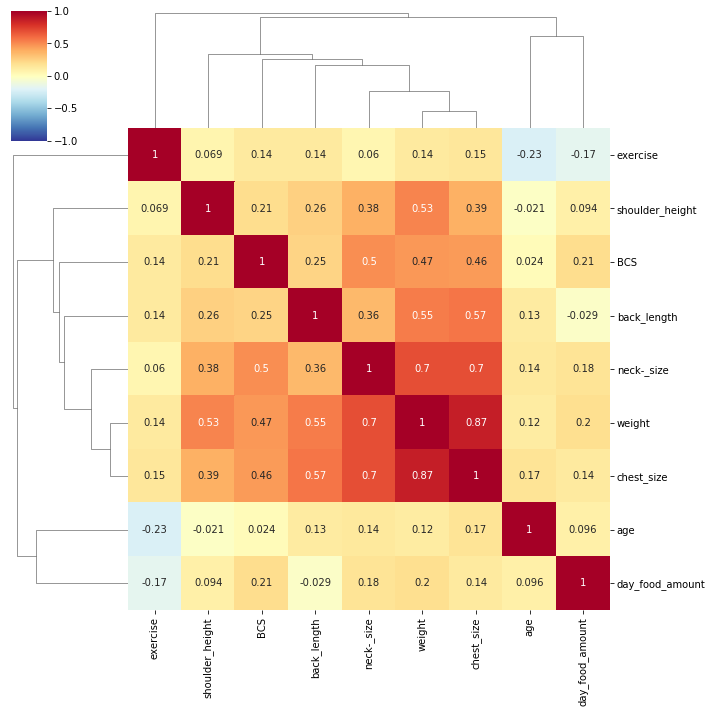

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

plt.figure(figsize = (40, 40))
sns.clustermap(corr_df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()

In [11]:
df.BCS.value_counts()

5    298
4    174
6    144
3     65
7     37
2     11
9      6
8      4
Name: BCS, dtype: int64

In [72]:
df['over_weight'] = np.NaN
df['over_weight'] = df['weight'] - df['weight'] * 100 / (100 + (df['BCS'] - 5) * 10)
df['over_weight']

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        0.000000
18       0.000000
30       0.000000
38      -0.638889
44       0.000000
           ...   
12645    0.833333
12660   -0.403333
12679    0.345455
12691    1.025000
12711    0.559091
Name: over_weight, Length: 739, dtype: float64

In [15]:
df.over_weight.describe()

count    739.000000
mean      -0.040108
std        1.009313
min       -9.000000
25%       -0.355000
50%        0.000000
75%        0.239091
max        7.666667
Name: over_weight, dtype: float64

<Figure size 2880x2880 with 0 Axes>

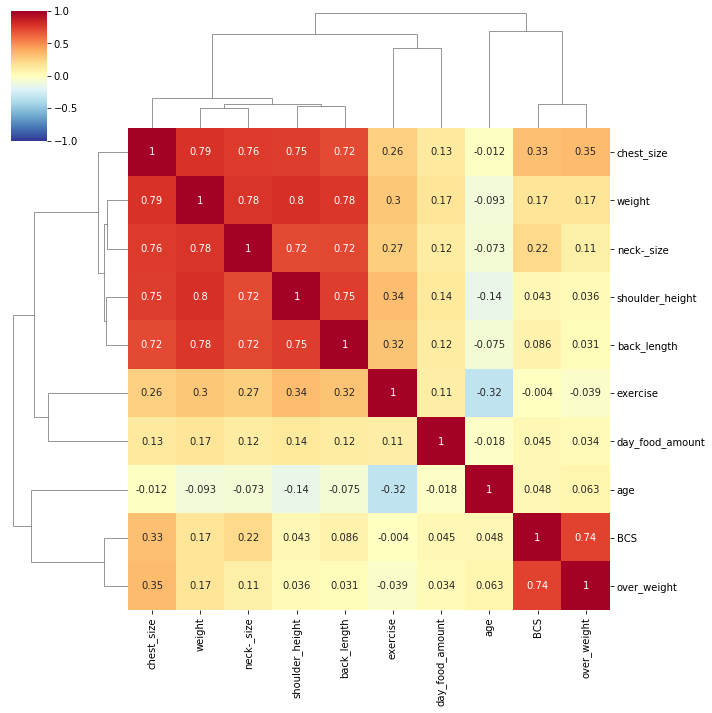

In [16]:
corr_df = df[['age', 'weight', 'shoulder_height',
              'neck-_size', 'back_length', 'chest_size',
              'exercise', 'BCS', 'day_food_amount', 'over_weight']].corr()
corr_df

plt.figure(figsize = (40, 40))
sns.clustermap(corr_df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()

In [27]:
data.loc[data['age'] < 1.0]['age'].count()

28

In [28]:
data.loc[data['age'] < 1.0]['age']

52       0.00
209      0.00
286      0.00
300      0.00
350      0.00
379      0.58
685      0.00
1102     0.00
1429     0.00
2376     0.00
2446     0.00
2478     0.00
2647     0.00
3430     0.50
5076     0.00
5512     0.00
6533     0.50
8421     0.00
9112     0.90
10937    0.00
11034    0.00
12015    0.80
12094    0.80
12114    0.70
12174    0.80
12491    0.70
12538    0.00
12660    0.00
Name: age, dtype: float64

In [79]:
# 휴식시 에너지 요구량
df['RER'] = np.NaN
df['RER'] = 70 * df['weight'] ** .75

# 1일 에너지 요구량 
df['DER'] = np.NaN

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [74]:
df

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER
0,10_000077,ETC,4.0,11.00,30.0,31.00,50.00,49.0,IM,3,5,2.02,0.000000,422.807375,NaN
18,10_000078,ETC,2.0,9.60,35.0,32.00,30.00,50.0,SF,1,5,4.02,0.000000,381.769707,NaN
30,10_000083,DRI,12.0,3.50,22.0,20.00,30.00,32.0,IF,1,5,4.80,0.000000,179.122059,NaN
38,10_000084,ETC,4.0,5.75,33.0,20.99,33.99,40.0,SF,3,4,2.40,-0.638889,259.925521,NaN
44,10_000085,POO,16.0,3.59,23.0,22.00,24.00,35.0,IF,3,5,1.69,0.000000,182.565570,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,20_000016,KOR,7.0,5.00,22.0,19.00,37.00,40.0,CM,2,7,4.40,0.833333,234.059107,NaN
12660,20_000018,KOR,0.0,3.63,25.0,36.00,17.00,32.0,IM,1,4,1.00,-0.403333,184.089072,NaN
12679,20_000019,SIA,7.0,3.80,24.0,22.00,22.00,35.0,SF,1,6,4.00,0.345455,190.517879,NaN
12691,20_000023,KOR,8.0,6.15,25.0,23.00,30.00,42.0,CM,1,7,3.20,1.025000,273.372218,NaN


In [80]:
### What we need
# d[1]: mission_id
# d[3]: age, d[4]: weight, d[9]: sex, d[10]: exercise, d[14]: RER, d[15]: DER

for d in df[0:1].itertuples():
    print(df.loc[df['mission_id'] == d[1], 'DER'])
df

0   NaN
Name: DER, dtype: float64


,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER
0,10_000077,ETC,4.0,11.00,30.0,31.00,50.00,49.0,IM,3,5,2.02,0.000000,422.807375,NaN
18,10_000078,ETC,2.0,9.60,35.0,32.00,30.00,50.0,SF,1,5,4.02,0.000000,381.769707,NaN
30,10_000083,DRI,12.0,3.50,22.0,20.00,30.00,32.0,IF,1,5,4.80,0.000000,179.122059,NaN
38,10_000084,ETC,4.0,5.75,33.0,20.99,33.99,40.0,SF,3,4,2.40,-0.638889,259.925521,NaN
44,10_000085,POO,16.0,3.59,23.0,22.00,24.00,35.0,IF,3,5,1.69,0.000000,182.565570,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,20_000016,KOR,7.0,5.00,22.0,19.00,37.00,40.0,CM,2,7,4.40,0.833333,234.059107,NaN
12660,20_000018,KOR,0.0,3.63,25.0,36.00,17.00,32.0,IM,1,4,1.00,-0.403333,184.089072,NaN
12679,20_000019,SIA,7.0,3.80,24.0,22.00,22.00,35.0,SF,1,6,4.00,0.345455,190.517879,NaN
12691,20_000023,KOR,8.0,6.15,25.0,23.00,30.00,42.0,CM,1,7,3.20,1.025000,273.372218,NaN


In [66]:
df

,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER
0,ETC,4.0,11.00,30.0,31.00,50.00,49.0,IM,3,5,2.02,0.000000,422.807375,NaN
18,ETC,2.0,9.60,35.0,32.00,30.00,50.0,SF,1,5,4.02,0.000000,381.769707,NaN
30,DRI,12.0,3.50,22.0,20.00,30.00,32.0,IF,1,5,4.80,0.000000,179.122059,NaN
38,ETC,4.0,5.75,33.0,20.99,33.99,40.0,SF,3,4,2.40,-0.638889,259.925521,NaN
44,POO,16.0,3.59,23.0,22.00,24.00,35.0,IF,3,5,1.69,0.000000,182.565570,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,KOR,7.0,5.00,22.0,19.00,37.00,40.0,CM,2,7,4.40,0.833333,234.059107,NaN
12660,KOR,0.0,3.63,25.0,36.00,17.00,32.0,IM,1,4,1.00,-0.403333,184.089072,NaN
12679,SIA,7.0,3.80,24.0,22.00,22.00,35.0,SF,1,6,4.00,0.345455,190.517879,NaN
12691,KOR,8.0,6.15,25.0,23.00,30.00,42.0,CM,1,7,3.20,1.025000,273.372218,NaN


In [47]:
df.sex.unique()

array(['IM', 'SF', 'IF', 'CM'], dtype=object)

In [52]:
df

,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER
0,ETC,4.0,11.00,30.0,31.00,50.00,49.0,IM,3,5,2.02,0.000000,422.807375,NaN
18,ETC,2.0,9.60,35.0,32.00,30.00,50.0,SF,1,5,4.02,0.000000,381.769707,NaN
30,DRI,12.0,3.50,22.0,20.00,30.00,32.0,IF,1,5,4.80,0.000000,179.122059,NaN
38,ETC,4.0,5.75,33.0,20.99,33.99,40.0,SF,3,4,2.40,-0.638889,259.925521,NaN
44,POO,16.0,3.59,23.0,22.00,24.00,35.0,IF,3,5,1.69,0.000000,182.565570,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,KOR,7.0,5.00,22.0,19.00,37.00,40.0,CM,2,7,4.40,0.833333,234.059107,NaN
12660,KOR,0.0,3.63,25.0,36.00,17.00,32.0,IM,1,4,1.00,-0.403333,184.089072,NaN
12679,SIA,7.0,3.80,24.0,22.00,22.00,35.0,SF,1,6,4.00,0.345455,190.517879,NaN
12691,KOR,8.0,6.15,25.0,23.00,30.00,42.0,CM,1,7,3.20,1.025000,273.372218,NaN


In [ ]:
for d in df[0:1].itertuples():
    
    df.iloc[d[0], d[14]] = d[13] * 3

In [81]:
for d in df.itertuples():
    
    # 0 ~ 4개월 강아지는 DER = RER * 3
    if d[3] < 0.4:
        df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 3
        
    # 4 ~ 10개월 (성견) 강아지 DER = RER * 2
    elif 0.4 <= d[3] < 8:
        df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 2
    
    # 나머지의 경우 중성화, 운동강도로 결정
    else:
        # 중성화 성견 중에
        if d[9] == 'SF' or d[9] == 'CM':
            
            # 운동강도 일주일에 한시간 미만인 강아지: DER = 1.2 * RER
            if d[10] == 1:
                df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 1.2
            
            # 운동강도 하루에 한시간 이상인 활동적인 강아지: DER = 2 * RER
            elif d[10] == 3:
                df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 2
            
            # 운동강도 보통인 중성화한 강아지: DER = 1.6 * RER
            else:
                df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 1.6
            
        
        # 중성화하지 않은 성견 중에
        else:
            # 운동강도 일주일에 한시간 미만인 강아지: DER = 1.2 * RER
            if d[10] == 1:
                df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 1.2
            
            # 운동강도 하루에 한시간 이상인 활동적인 강아지: DER = 2 * RER
            elif d[10] == 3:
                df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 2
            
            # 운동강도 보통인 중성화하지 않은 강아지: DER = 1.8 * RER
            else:
                df.loc[df['mission_id'] == d[1], 'DER'] = d[14] * 1.8
                
        

/home/jh20/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [83]:
df.DER.isnull().sum()

0

In [84]:
df.DER.describe()

count     739.000000
mean      483.653509
std       369.784911
min         0.000000
25%       291.601171
50%       387.784313
75%       532.723300
max      3709.263351
Name: DER, dtype: float64

In [85]:
df.RER.describe()

count     739.000000
mean      261.061056
std       167.369889
min         0.000000
25%       170.414154
50%       211.209237
75%       288.241157
max      1252.513541
Name: RER, dtype: float64

In [86]:
df.weight.describe()

count    739.000000
mean       6.202598
std        6.056658
min        0.000000
25%        3.275000
50%        4.360000
75%        6.600000
max       46.800000
Name: weight, dtype: float64

In [93]:
hello = pd.read_csv('./pet_df.csv')

In [94]:
hello.loc[hello['mission-id'] == '10_001559']

,type,species,mission-id,provider-code,breed,age,class,sex,weight,shoulder-height,...,environment,defecation,food-amount,snack-amount,food-kind,image-id,label,points,shape,part
10643,A,10,10_001559,2,ETC,11.0,MS,IM,0.0,42.0,...,1,1,2.98,0.0,1,A_10_ETC_IM_20221207_10_001559_06.jpg,전신,"[[198, 216], [2665, 2405]]",Bounding Box,좌측면상45도
10644,A,10,10_001559,2,ETC,11.0,MS,IM,0.0,42.0,...,1,1,2.98,0.0,1,A_10_ETC_IM_20221207_10_001559_14.jpg,두상,"[[895, 665], [2381, 1941]]",Bounding Box,두상전면중앙
10645,A,10,10_001559,2,ETC,11.0,MS,IM,0.0,42.0,...,1,1,2.98,0.0,1,A_10_ETC_IM_20221207_10_001559_08.jpg,전신,"[[685, 236], [3137, 2337]]",Bounding Box,우측면중앙
10646,A,10,10_001559,2,ETC,11.0,MS,IM,0.0,42.0,...,1,1,2.98,0.0,1,A_10_ETC_IM_20221207_10_001559_19.jpg,두상,"[[673, 1353], [2141, 2748]]",Bounding Box,두상상측면
10647,A,10,10_001559,2,ETC,11.0,MS,IM,0.0,42.0,...,1,1,2.98,0.0,1,A_10_ETC_IM_20221207_10_001559_04.jpg,전신,"[[401, 660], [2502, 2268]]",Bounding Box,좌측면좌45도
10648,A,10,10_001559,2,ETC,11.0,MS,IM,0.0,42.0,...,1,1,2.98,0.0,1,A_10_ETC_IM_20221207_10_001559_01.jpg,전신,"[[1032, 438], [2270, 2829]]",Bounding Box,전면
10649,A,10,10_001559,2,ETC,11.0,MS,IM,0.0,42.0,...,1,1,2.98,0.0,1,A_10_ETC_IM_20221207_10_001559_05.jpg,전신,"[[1548, 353], [3355, 2482]]",Bounding Box,좌측면우45도
10650,A,10,10_001559,2,ETC,11.0,MS,IM,0.0,42.0,...,1,1,2.98,0.0,1,A_10_ETC_IM_20221207_10_001559_10.jpg,전신,"[[1242, 313], [3814, 2272]]",Bounding Box,우측면우45도
10651,A,10,10_001559,2,ETC,11.0,MS,IM,0.0,42.0,...,1,1,2.98,0.0,1,A_10_ETC_IM_20221207_10_001559_20.jpg,코,"[[919, 1539], [1649, 2147]]",Bounding Box,비문전면
10652,A,10,10_001559,2,ETC,11.0,MS,IM,0.0,42.0,...,1,1,2.98,0.0,1,A_10_ETC_IM_20221207_10_001559_13.jpg,전신,"[[849, 237], [2039, 3023]]",Bounding Box,상측면


In [99]:
data.loc[data['mission-id'] == '10_001559'][['weight', 'shoulder-height', 'BCS', 'neck-size']]

,weight,shoulder-height,BCS,neck-size
10643,0.0,42.0,4,35.0


In [100]:
data.loc[data['mission-id'] == '10_001560'][['weight', 'shoulder-height', 'BCS', 'neck-size']]

,weight,shoulder-height,BCS,neck-size
10663,11.99,41.0,7,36.0


In [87]:
df.loc[df['weight'] == 0]

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER
10643,10_001559,ETC,11.0,0.0,42.0,35.0,36.0,54.0,IM,1,4,2.98,0.0,0.0,0.0


In [103]:
df.loc[df['mission_id'] == '10_001559'].index

Int64Index([10643], dtype='int64')

In [106]:
df.drop(index = [10643], inplace = True)

/home/jh20/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [107]:
df.weight.describe()

count    738.000000
mean       6.211003
std        6.056451
min        0.900000
25%        3.292500
50%        4.370000
75%        6.600000
max       46.800000
Name: weight, dtype: float64

In [108]:
df.RER.describe()

count     738.000000
mean      261.414797
std       167.206729
min        64.681476
25%       171.096966
50%       211.572347
75%       288.241157
max      1252.513541
Name: RER, dtype: float64

In [48]:
df.exercise.value_counts()

2    274
1    271
3    194
Name: exercise, dtype: int64

In [109]:
df

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER
0,10_000077,ETC,4.0,11.00,30.0,31.00,50.00,49.0,IM,3,5,2.02,0.000000,422.807375,845.614750
18,10_000078,ETC,2.0,9.60,35.0,32.00,30.00,50.0,SF,1,5,4.02,0.000000,381.769707,763.539414
30,10_000083,DRI,12.0,3.50,22.0,20.00,30.00,32.0,IF,1,5,4.80,0.000000,179.122059,214.946471
38,10_000084,ETC,4.0,5.75,33.0,20.99,33.99,40.0,SF,3,4,2.40,-0.638889,259.925521,519.851042
44,10_000085,POO,16.0,3.59,23.0,22.00,24.00,35.0,IF,3,5,1.69,0.000000,182.565570,365.131139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,20_000016,KOR,7.0,5.00,22.0,19.00,37.00,40.0,CM,2,7,4.40,0.833333,234.059107,468.118213
12660,20_000018,KOR,0.0,3.63,25.0,36.00,17.00,32.0,IM,1,4,1.00,-0.403333,184.089072,552.267216
12679,20_000019,SIA,7.0,3.80,24.0,22.00,22.00,35.0,SF,1,6,4.00,0.345455,190.517879,381.035758
12691,20_000023,KOR,8.0,6.15,25.0,23.00,30.00,42.0,CM,1,7,3.20,1.025000,273.372218,328.046662


In [110]:
df.to_csv('pet_DER_df.csv', index = False)

In [111]:
df.corr()

,age,weight,shoulder_height,neck_size,back_length,chest_size,exercise,BCS,day_food_amount,over_weight,RER,DER
age,1.000000,-0.091719,-0.146586,-0.074940,-0.075428,-0.013976,-0.319382,0.049724,-0.017818,0.062615,-0.087412,-0.257637
weight,-0.091719,1.000000,0.801553,0.785855,0.776170,0.794775,0.297889,0.165820,0.170145,0.170796,0.993362,0.955564
shoulder_height,-0.146586,0.801553,1.000000,0.717514,0.751353,0.751572,0.342902,0.044583,0.144990,0.035999,0.822048,0.810105
neck_size,-0.074940,0.785855,0.717514,1.000000,0.722057,0.757512,0.270404,0.224766,0.122429,0.107518,0.812259,0.767597
back_length,-0.075428,0.776170,0.751353,0.722057,1.000000,0.715442,0.320199,0.086257,0.119951,0.030769,0.800804,0.766576
chest_size,-0.013976,0.794775,0.751572,0.757512,0.715442,1.000000,0.265491,0.333270,0.134385,0.351104,0.830501,0.772891
exercise,-0.319382,0.297889,0.342902,0.270404,0.320199,0.265491,1.000000,-0.005241,0.110026,-0.038830,0.309425,0.411285
BCS,0.049724,0.165820,0.044583,0.224766,0.086257,0.333270,-0.005241,1.000000,0.044721,0.738102,0.189132,0.153908
day_food_amount,-0.017818,0.170145,0.144990,0.122429,0.119951,0.134385,0.110026,0.044721,1.000000,0.033548,0.171900,0.173795
over_weight,0.062615,0.170796,0.035999,0.107518,0.030769,0.351104,-0.038830,0.738102,0.033548,1.000000,0.165852,0.162470


In [112]:
df_mal = df.loc[df['breed'] == 'MAL']
df_mal

,mission_id,breed,age,weight,shoulder_height,neck_size,back_length,chest_size,sex,exercise,BCS,day_food_amount,over_weight,RER,DER
140,10_000142,MAL,7.0,3.39,20.0,25.0,10.0,32.98,CM,1,5,2.00,0.000000,174.883088,349.766176
209,10_000216,MAL,0.0,2.91,21.0,21.0,19.0,34.00,IM,1,7,1.00,0.485000,155.961636,467.884908
222,10_000217,MAL,18.0,2.99,21.0,21.0,19.0,34.00,SF,1,5,1.00,0.000000,159.166414,190.999697
458,10_000236,MAL,1.0,1.70,20.0,16.0,24.0,28.00,IF,2,5,0.76,0.000000,104.216079,208.432159
476,10_000237,MAL,12.0,6.00,22.0,27.0,23.0,47.00,CM,1,7,1.60,1.000000,268.356104,322.027325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11916,10_100050,MAL,2.0,2.50,25.0,22.0,28.0,30.00,IF,2,5,1.01,0.000000,139.172378,278.344755
12435,10_101464,MAL,9.0,3.10,22.0,22.0,23.0,33.00,SF,1,6,4.60,0.281818,163.538237,196.245884
12453,10_101465,MAL,8.0,3.20,25.0,20.0,23.0,34.00,CM,1,6,4.60,0.290909,167.479063,200.974876
12472,10_101466,MAL,9.8,3.69,27.0,28.0,35.0,39.00,CM,2,4,1.00,-0.410000,186.366485,298.186376


In [113]:
df_mal.corr()

,age,weight,shoulder_height,neck_size,back_length,chest_size,exercise,BCS,day_food_amount,over_weight,RER,DER
age,1.000000,0.120856,-0.020861,0.140685,0.130585,0.173287,-0.225163,0.023958,0.095676,0.045372,0.124304,-0.357964
weight,0.120856,1.000000,0.526495,0.697977,0.550526,0.869550,0.139779,0.467497,0.195891,0.443738,0.997882,0.758845
shoulder_height,-0.020861,0.526495,1.000000,0.383556,0.264562,0.387651,0.068796,0.205821,0.093803,0.188477,0.521840,0.460442
neck_size,0.140685,0.697977,0.383556,1.000000,0.355649,0.697301,0.060332,0.497840,0.177981,0.469118,0.709010,0.498837
back_length,0.130585,0.550526,0.264562,0.355649,1.000000,0.571486,0.136615,0.245816,-0.028547,0.235218,0.561719,0.399357
chest_size,0.173287,0.869550,0.387651,0.697301,0.571486,1.000000,0.154186,0.458068,0.135307,0.415323,0.874911,0.647982
exercise,-0.225163,0.139779,0.068796,0.060332,0.136615,0.154186,1.000000,0.135464,-0.170788,0.109320,0.145481,0.463318
BCS,0.023958,0.467497,0.205821,0.497840,0.245816,0.458068,0.135464,1.000000,0.206379,0.967368,0.472564,0.385456
day_food_amount,0.095676,0.195891,0.093803,0.177981,-0.028547,0.135307,-0.170788,0.206379,1.000000,0.198294,0.199602,0.023572
over_weight,0.045372,0.443738,0.188477,0.469118,0.235218,0.415323,0.109320,0.967368,0.198294,1.000000,0.440517,0.334006


In [119]:
df.day_food_amount.describe()

count    738.000000
mean       2.969686
std        3.831625
min        0.400000
25%        1.500000
50%        2.290000
75%        3.400000
max       79.920000
Name: day_food_amount, dtype: float64

In [118]:
334 * 8

2672

In [121]:
df.weight.max()

46.8

In [120]:
df.DER.describe()

count     738.000000
mean      484.308866
std       369.605996
min       119.500376
25%       291.806620
50%       388.158021
75%       532.744044
max      3709.263351
Name: DER, dtype: float64

In [116]:
df['day_cal'] = np.NaN
df['day_cal'] = df['day_food_amount'] * 334
df['day_cal'].describe()

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count      738.000000
mean       991.875003
std       1279.762787
min        133.600000
25%        501.000000
50%        764.860000
75%       1135.600000
max      26693.280000
Name: day_cal, dtype: float64

In [123]:
df['cal_diff'] = np.NaN
df['cal_diff'] = df['day_cal'] - df['DER']
df['cal_diff'].describe()

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count      738.000000
mean       507.566137
std       1268.853052
min      -2700.583351
25%         68.940022
50%        337.322664
75%        668.092094
max      26475.718315
Name: cal_diff, dtype: float64

In [128]:
data['food-amount'].max()

19.98

In [129]:
data.loc[data['food-amount'] == 19.98]

,type,species,mission-id,provider-code,breed,age,class,sex,weight,shoulder-height,...,defecation,food-amount,snack-amount,food-kind,image-id,label,points,shape,part,day_food_amount
4621,B,10,10_000957,16,CHI,8.0,SS,SF,1.8,17.0,...,1,19.98,0.0,1,B_10_CHI_SF_20221117_10_000957_01.jpg,전신,"[[130, 45], [2237, 3404]]",Bounding Box,전면,79.92


In [124]:
df.corr()

,age,weight,shoulder_height,neck_size,back_length,chest_size,exercise,BCS,day_food_amount,over_weight,RER,DER,day_cal,cal_diff
age,1.000000,-0.091719,-0.146586,-0.074940,-0.075428,-0.013976,-0.319382,0.049724,-0.017818,0.062615,-0.087412,-0.257637,-0.017818,0.057076
weight,-0.091719,1.000000,0.801553,0.785855,0.776170,0.794775,0.297889,0.165820,0.170145,0.170796,0.993362,0.955564,0.170145,-0.106740
shoulder_height,-0.146586,0.801553,1.000000,0.717514,0.751353,0.751572,0.342902,0.044583,0.144990,0.035999,0.822048,0.810105,0.144990,-0.089740
neck_size,-0.074940,0.785855,0.717514,1.000000,0.722057,0.757512,0.270404,0.224766,0.122429,0.107518,0.812259,0.767597,0.122429,-0.100113
back_length,-0.075428,0.776170,0.751353,0.722057,1.000000,0.715442,0.320199,0.086257,0.119951,0.030769,0.800804,0.766576,0.119951,-0.102314
chest_size,-0.013976,0.794775,0.751572,0.757512,0.715442,1.000000,0.265491,0.333270,0.134385,0.351104,0.830501,0.772891,0.134385,-0.089597
exercise,-0.319382,0.297889,0.342902,0.270404,0.320199,0.265491,1.000000,-0.005241,0.110026,-0.038830,0.309425,0.411285,0.110026,-0.008832
BCS,0.049724,0.165820,0.044583,0.224766,0.086257,0.333270,-0.005241,1.000000,0.044721,0.738102,0.189132,0.153908,0.044721,0.000273
day_food_amount,-0.017818,0.170145,0.144990,0.122429,0.119951,0.134385,0.110026,0.044721,1.000000,0.033548,0.171900,0.173795,1.000000,0.957973
over_weight,0.062615,0.170796,0.035999,0.107518,0.030769,0.351104,-0.038830,0.738102,0.033548,1.000000,0.165852,0.162470,0.033548,-0.013490


In [28]:
newdata.iloc[0, :]

type                       B
species                   10
mission-id         10_001074
provider-code             16
breed                    DRI
age                     10.1
class                     SS
sex                       CM
weight                   8.8
shoulder-height         24.5
neck-size               30.0
back-length               37
chest-size              46.5
BCS                        6
body-part                 11
exercise                   2
food-count                 2
environment                1
defecation                 1
food-amount             0.49
snack-amount              10
food-kind                  1
disease                  NOR
diseaseName              NaN
CRP                     2.85
lgG                     4.96
IL-6                    1.86
AFP                     0.57
heart-rate               108
breating-rate             24
body-heat               38.9
stress                   1.3
Name: 0, dtype: object